## Limpieza y Transformación de Datos
En esta sección se realiza el tratamiento de los datos para garantizar su calidad y adecuación antes del análisis. 
Esto incluye la identificación y manejo de valores nulos, la transformación de variables categóricas a formatos adecuados como 
variables binarias, y la conversión o recodificación de datos según sea necesario para facilitar su interpretación y análisis posterior. 

Este proceso es fundamental para evitar sesgos, errores o pérdidas de información relevantes durante el modelado o interpretación estadística.

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("datasetColumnas.csv", low_memory=False)

# Mostrar las primeras filas para revisión visual
print("Primeras filas del dataset:")
display(df.head())

# Mostrar información general del DataFrame
print("\nInformación general del dataset:")
df.info()

# Ver cantidad de valores nulos por columna
print("\nValores nulos por columna:")
display(df.isnull().sum().sort_values(ascending=False))


Primeras filas del dataset:


,Trabajo,Sexo,Religion,Etnia,EstCivil,edad,Terapia,TrataPsi,¿Tienehijos,UnAca,...,mhc_pwb,hiaff,loaff,hifunc,lofunc,hiaffect,loaffect,hifunct,lofunct,mhc_dx
0,3.0,3.0,1.0,1.0,1.0,22.0,1.0,1.0,0.0,4,...,0.0,0,3,0,11,0,1,0,1,0
1,2.0,1.0,1.0,1.0,8.0,33.0,0.0,0.0,0.0,9,...,13.0,0,0,0,5,0,0,0,0,1
2,0.0,1.0,1.0,1.0,1.0,19.0,0.0,0.0,0.0,5,...,20.0,0,0,3,3,0,0,0,0,1
3,3.0,1.0,2.0,1.0,1.0,22.0,0.0,0.0,0.0,5,...,18.0,0,0,1,1,0,0,0,0,1
4,3.0,1.0,1.0,1.0,1.0,19.0,0.0,0.0,0.0,5,...,20.0,3,0,4,3,1,0,0,0,1



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8207 entries, 0 to 8206
Data columns (total 78 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Trabajo                                                        8206 non-null   float64
 1   Sexo                                                           8206 non-null   float64
 2   Religion                                                       8206 non-null   float64
 3   Etnia                                                          8206 non-null   float64
 4   EstCivil                                                       8206 non-null   float64
 5   edad                                                           8206 non-null   float64
 6   Terapia                                                        8206 non-null   float64
 7   TrataPsi                  

Marihuana¿Quétipodesustanciaspsicoactivashaconsumidoenlosúlti    7946
Tabaco¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimos    7421
Alcohol¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimo    6486
ConsumoSustancias                                                 857
Semestre                                                          265
                                                                 ... 
hiaffect                                                            0
loaffect                                                            0
hifunct                                                             0
lofunct                                                             0
mhc_dx                                                              0
Length: 78, dtype: int64

**Plan para valores que faltan**

Antes de suprimir o imputar (reemplazar) valores que faltan, se pregunta lo siguiente:
* ¿Cuáles fueron los mecanismos que causaron los valores que faltan?
* ¿Estos valores que faltan, faltan al azar?
* ¿Hay filas o columnas faltantes de las que no esté al tanto?

Durante la limpieza de datos para análisis o modelado, también se debe prestar atención a los datos que no están presentes. Esto permite identificar posibles problemas en la recolección, sesgos en los resultados o desviaciones estadísticas relevantes.

En general, hay dos caminos para tratar los valores faltantes:

 1. **Eliminar los registros con datos ausentes.**

 2. **Imputar los valores con alguna estrategia (media, mediana, moda, interpolación, etc.).**

La elección depende del contexto. Eliminar filas con datos faltantes puede llevar a la pérdida significativa de información, lo cual afectaría la calidad del modelo. Por otro lado, imputar sin una justificación sólida puede introducir sesgos importantes, especialmente si se realiza de forma arbitraria.

En casos donde una fila tiene múltiples valores ausentes, puede ser más razonable descartarla por completo, ya que requeriría hacer demasiadas suposiciones para su reconstrucción.

### Observaciones extras

Para el caso de la imputación de datos, se utiliza la técnica de imputación estadística, esta implica reemplazar los valores faltantes con una medida de tendencia central como la media, la mediana o la moda. Cada una debe ser justificable para reducir las probabilidades de sesgar la información. 

| Técnica | Cuándo usarla | Recomendación |
| --- | --- | --- |
|Media|	Cuando los datos están simétricamente distribuidos (sin sesgo).	|Útil en datos continuos sin valores atípicos fuertes.|
|Mediana|Cuando los datos son sesgados o tienen outliers (valores extremos).|Preferible en distribuciones asimétricas, como ingresos, edad, etc.|
|Moda	|Cuando los datos son categóricos (por ejemplo, género, país, etc.).|Se usa para datos no numéricos o con baja cardinalidad (pocos valores distintos).|


### Tipo de Datos Faltantes en el Dataset

En el análisis preliminar del dataset proporcionado (aproximadamente 8000 respuestas), se ha identificado que los valores faltantes no parecen estar distribuidos aleatoriamente. Por el contrario, los patrones observados y el contexto de recolección sugieren que los datos ausentes podrían deberse a factores relacionados con la propia naturaleza de las preguntas o con las características del encuestado.

Algunas observaciones relevantes incluyen:

- En ciertos casos, los participantes **omitieron preguntas sensibles** o de carácter personal, posiblemente por incomodidad o desconfianza.
- Otros valores faltantes podrían deberse a **fatiga en la respuesta del cuestionario**, especialmente si estas preguntas se encontraban en secciones finales del formulario.
- También se identifica la posibilidad de que algunos participantes **hayan respondido de forma deshonesta o poco comprometida**, generando no solo omisiones sino también respuestas ruidosas o inconsistentes.

Dado este contexto, los datos faltantes se clasifican mayoritariamente como:

> **Missing Not At Random (MNAR):** la ausencia de datos está relacionada con el valor que falta o con factores no observables directamente.

---

### Estrategia de Abordaje

Debido a que la muestra ya ha sido recolectada y **no es posible volver a obtener una nueva**, el análisis debe realizarse con la información disponible. Por ello, se adoptará el siguiente enfoque:

- Se **analizará cada columna con valores faltantes** para determinar el tipo de variable, la proporción de faltantes y su posible relación con otras variables.
- Se evaluará **la viabilidad de realizar imputaciones estadísticas** simples (como media, mediana o moda) en variables numéricas o categóricas, cuando el contexto lo permita.
- Para casos más complejos o con mayor sesgo, se considerará el uso de **técnicas avanzadas como MICE (Multiple Imputation by Chained Equations)**, que permiten imputar valores teniendo en cuenta múltiples variables relacionadas.
- En columnas donde la proporción de datos faltantes sea muy alta o no exista una justificación válida para la imputación, se optará por eliminar la variable del análisis o tratarla por separado, según corresponda.

---

### Consideraciones Finales

Es importante reconocer que **toda imputación introduce cierto grado de incertidumbre o sesgo**, especialmente cuando se trabaja con datos MNAR. Por lo tanto, cualquier modelo construido a partir de este dataset deberá ser interpretado con cautela, documentando adecuadamente las decisiones tomadas durante la limpieza y transformación de los datos.

Este enfoque busca **equilibrar el rigor metodológico con la practicidad del análisis**, permitiendo obtener modelos útiles sin perder de vista las limitaciones del proceso de recolección de datos.


### Evaluación de imputación

Una forma útil y accesible de evaluar si una imputación fue adecuada es comparar la distribución original (sin valores faltantes) con la distribución posterior a la imputación. Si la forma general de la distribución (asimetría, curtosis, moda, etc.) se mantiene similar, puede considerarse una imputación adecuada.

Esto es particularmente válido cuando la cantidad de valores faltantes es relativamente baja.

Consideraciones:
* Si la distribución cambia mucho, la imputación podría estar introduciendo sesgo artificial.

* Esta comparación visual no es perfecta, pero es una herramienta exploratoria muy valiosa cuando no se dispone de los verdaderos valores.

# Inicio de Analisis e Imputación de datos

## Trabajo
Es una variable categórica codificada numéricamente, y eso la hace discreta, porque toma valores contados y limitados (0, 1, 2, 3).
Valores:
  * Trabajo de jornada completa = 0 
  * Trabajo de medio tiempo = 1 
  * Emprendimiento = 2 
  * Emprendimiento = 3

 **Nota:** Observe como 'Emprendimiento' está duplicado, se unirán en un solo valor, en este caso se transforma el '3' por un '2'.

In [2]:
columna = 'Trabajo'

# Número de valores faltantes
faltantes = df[columna].isna().sum()

# Total de registros
total = len(df[columna])

# Porcentaje de valores faltantes
porcentaje = (faltantes / total) * 100

print(f"Columna '{columna}':")
print(f"Valores faltantes: {faltantes}")
print(f"Porcentaje faltante: {porcentaje:.2f}%")

Columna 'Trabajo':
Valores faltantes: 1
Porcentaje faltante: 0.01%


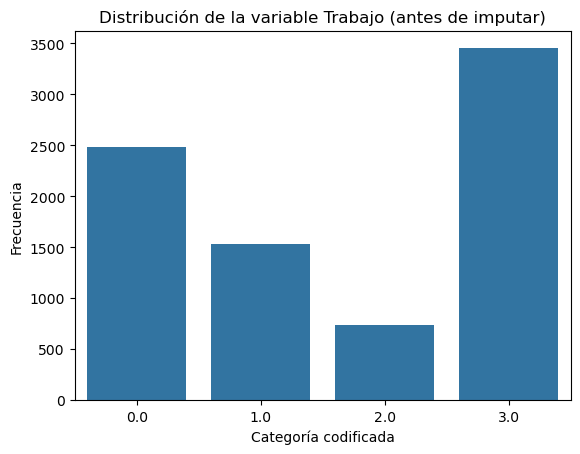

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de la variable 'Trabajo' antes de la imputación
sns.countplot(data=df, x='Trabajo')
plt.title('Distribución de la variable Trabajo (antes de imputar)')
plt.xlabel('Categoría codificada')
plt.ylabel('Frecuencia')
plt.show()


In [4]:
# Imputar valor faltante en 'Trabajo' con la moda (valor más frecuente)
moda_trabajo = df['Trabajo'].mode()[0]
df['Trabajo'] = df['Trabajo'].fillna(moda_trabajo)

# Corregir el valor 3 a 2 en la columna 'Trabajo'
df['Trabajo'] = df['Trabajo'].replace(3, 2)

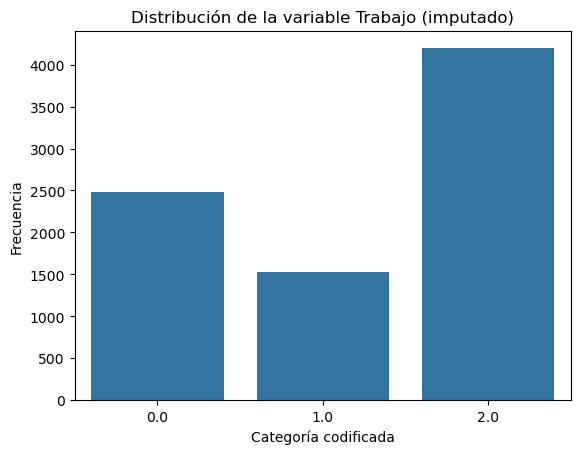

In [5]:

# Gráfico de la variable 'Trabajo' despues de la imputación
sns.countplot(data=df, x='Trabajo')
plt.title('Distribución de la variable Trabajo (imputado)')
plt.xlabel('Categoría codificada')
plt.ylabel('Frecuencia')
plt.show()


## Sexo
Categórica nominal (sin orden inherente entre los valores).

Codificación:

* 1 = Hombre
* 2 = Mujer
* 3 = Prefiero no decirlo

Naturaleza: Discreta (porque toma valores separados y finitos).

Valores faltantes: 1 (0.01%). Lo más apropiado es imputar con la moda (el valor más frecuente en la columna).

In [6]:
columna = 'Sexo'

# Número de valores faltantes
faltantes = df[columna].isna().sum()

# Total de registros
total = len(df[columna])

# Porcentaje de valores faltantes
porcentaje = (faltantes / total) * 100

print(f"Columna '{columna}':")
print(f"Valores faltantes: {faltantes}")
print(f"Porcentaje faltante: {porcentaje:.2f}%")

Columna 'Sexo':
Valores faltantes: 1
Porcentaje faltante: 0.01%


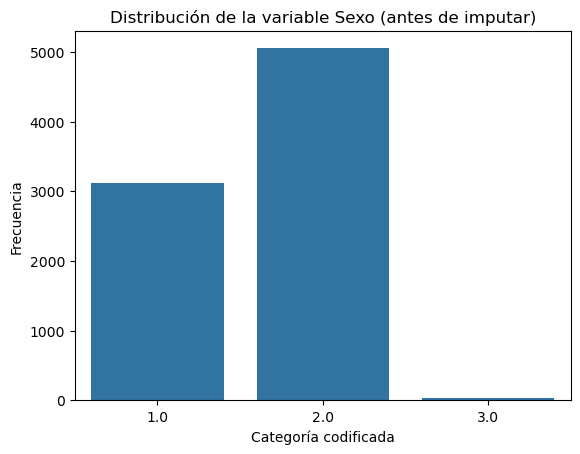

In [7]:
# Gráfico antes de imputar
sns.countplot(data=df, x='Sexo')
plt.title('Distribución de la variable Sexo (antes de imputar)')
plt.xlabel('Categoría codificada')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
# Imputar con la moda (valor más frecuente)
moda_sexo = df['Sexo'].mode()[0]
df['Sexo'] = df['Sexo'].fillna(moda_sexo)

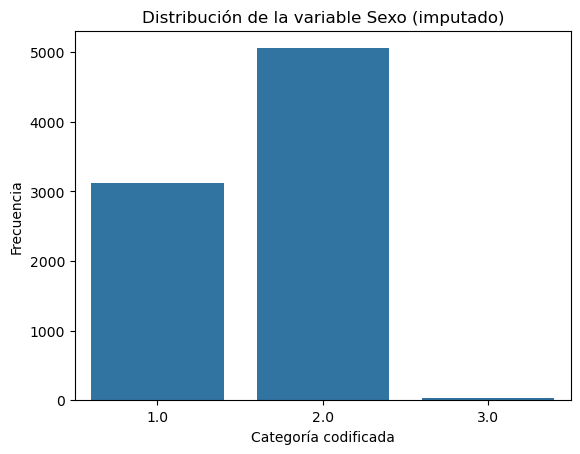

In [9]:
# Gráfico después de imputar
sns.countplot(data=df, x='Sexo')
plt.title('Distribución de la variable Sexo (imputado)')
plt.xlabel('Categoría codificada')
plt.ylabel('Frecuencia')
plt.show()

## Religión,  Etnia, EstCivil, edad, Terapia, TrataPsi
Religion
 * Tipo: Categórica nominal.
 * Valores faltantes: 1 (0.01%)
 * Imputación recomendada: Imputación por moda, ya que es nominal.

Etnia
* Tipo: Categórica nominal.
* Imputación: Moda.

EstCivil (Estado Civil)
* Tipo: Categórica ordinal (tiene cierto orden lógico).
* Imputación: Moda (por simplicidad, ya que solo hay 1 valor faltante).

edad
* Tipo: Numérica continua.
* Imputación recomendada: Media o mediana (depende de la distribución).

Terapia
* Tipo: Categórica binaria.
* Imputación: Moda.

TrataPsi
* Tipo: Categórica ordinal (Sí > No).
* Imputación: Moda, porque solo hay 1 valor faltante.

In [10]:
columnas = ['Religion','Etnia','EstCivil','edad','Terapia','TrataPsi']

for c in columnas:
    # Número de valores faltantes
    faltantes = df[c].isna().sum()
    
    # Total de registros
    total = len(df[c])
    
    # Porcentaje de valores faltantes
    porcentaje = (faltantes / total) * 100
    
    print(f"Columna '{c}':")
    print(f"Valores faltantes: {faltantes}")
    print(f"Porcentaje faltante: {porcentaje:.2f}% \n")

Columna 'Religion':
Valores faltantes: 1
Porcentaje faltante: 0.01% 

Columna 'Etnia':
Valores faltantes: 1
Porcentaje faltante: 0.01% 

Columna 'EstCivil':
Valores faltantes: 1
Porcentaje faltante: 0.01% 

Columna 'edad':
Valores faltantes: 1
Porcentaje faltante: 0.01% 

Columna 'Terapia':
Valores faltantes: 1
Porcentaje faltante: 0.01% 

Columna 'TrataPsi':
Valores faltantes: 1
Porcentaje faltante: 0.01% 



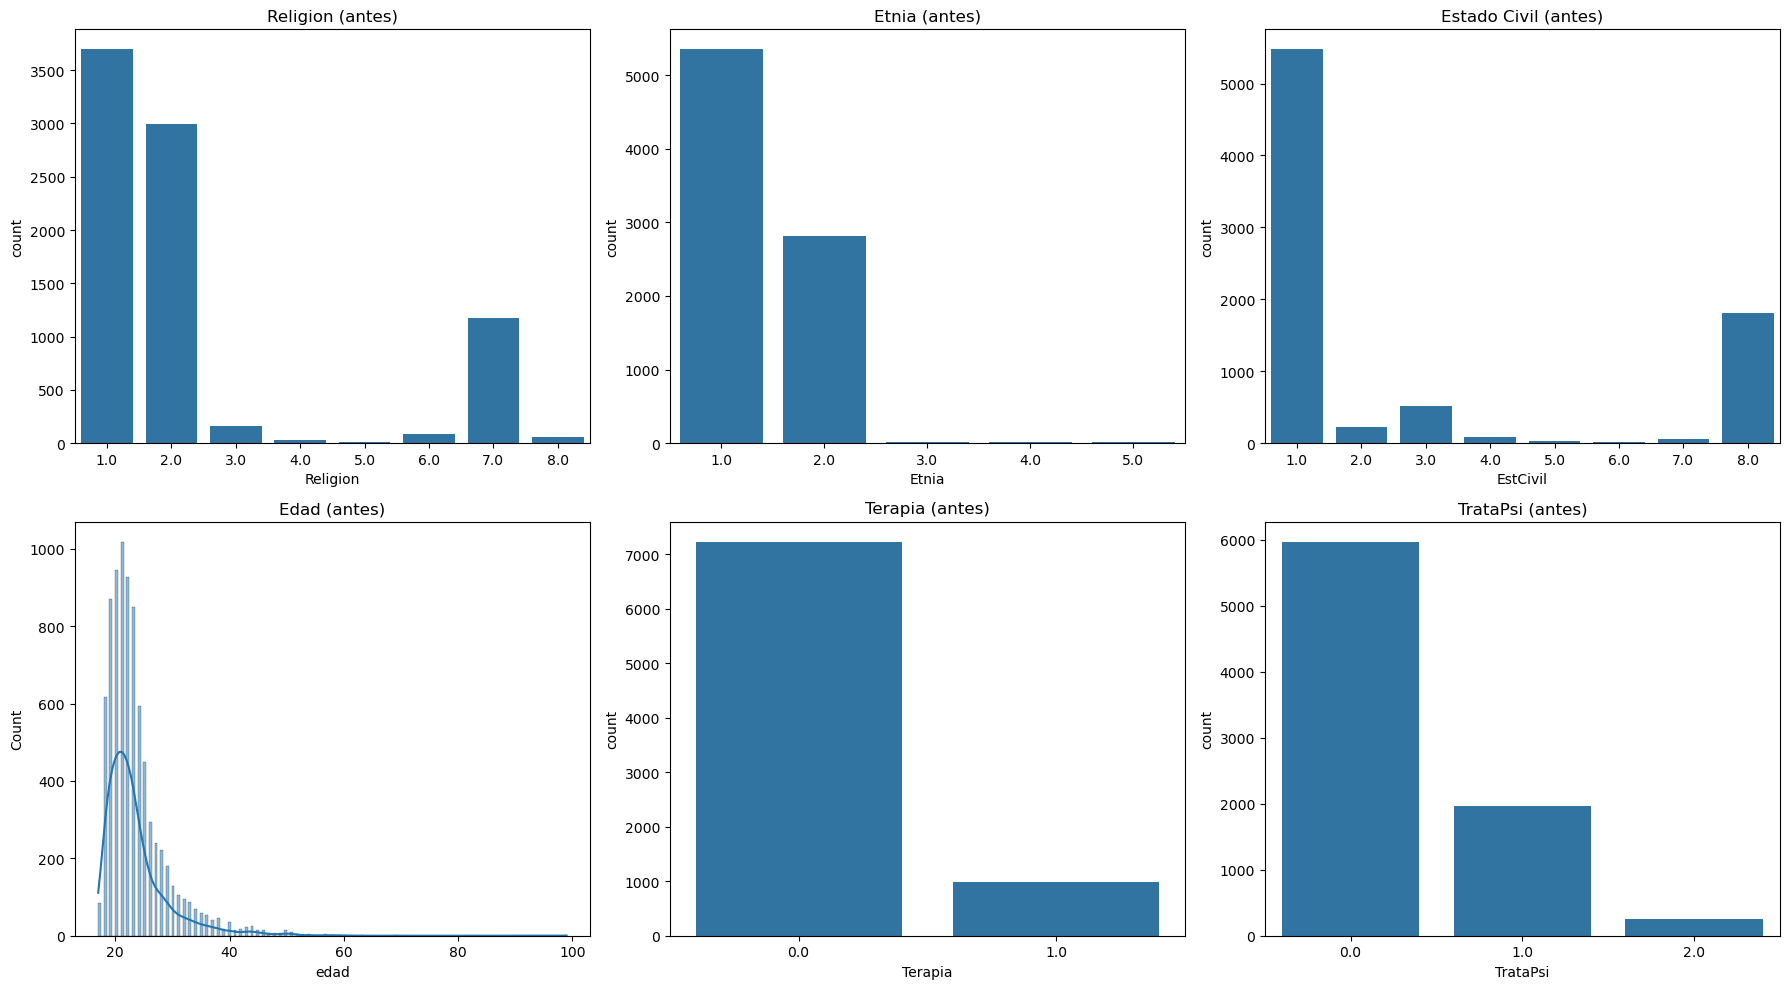

In [11]:
#Graficos antes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(x='Religion', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Religion (antes)')

sns.countplot(x='Etnia', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Etnia (antes)')

sns.countplot(x='EstCivil', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Estado Civil (antes)')

sns.histplot(df['edad'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Edad (antes)')

sns.countplot(x='Terapia', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Terapia (antes)')

sns.countplot(x='TrataPsi', data=df, ax=axs[1, 2])
axs[1, 2].set_title('TrataPsi (antes)')

plt.tight_layout()
plt.show()

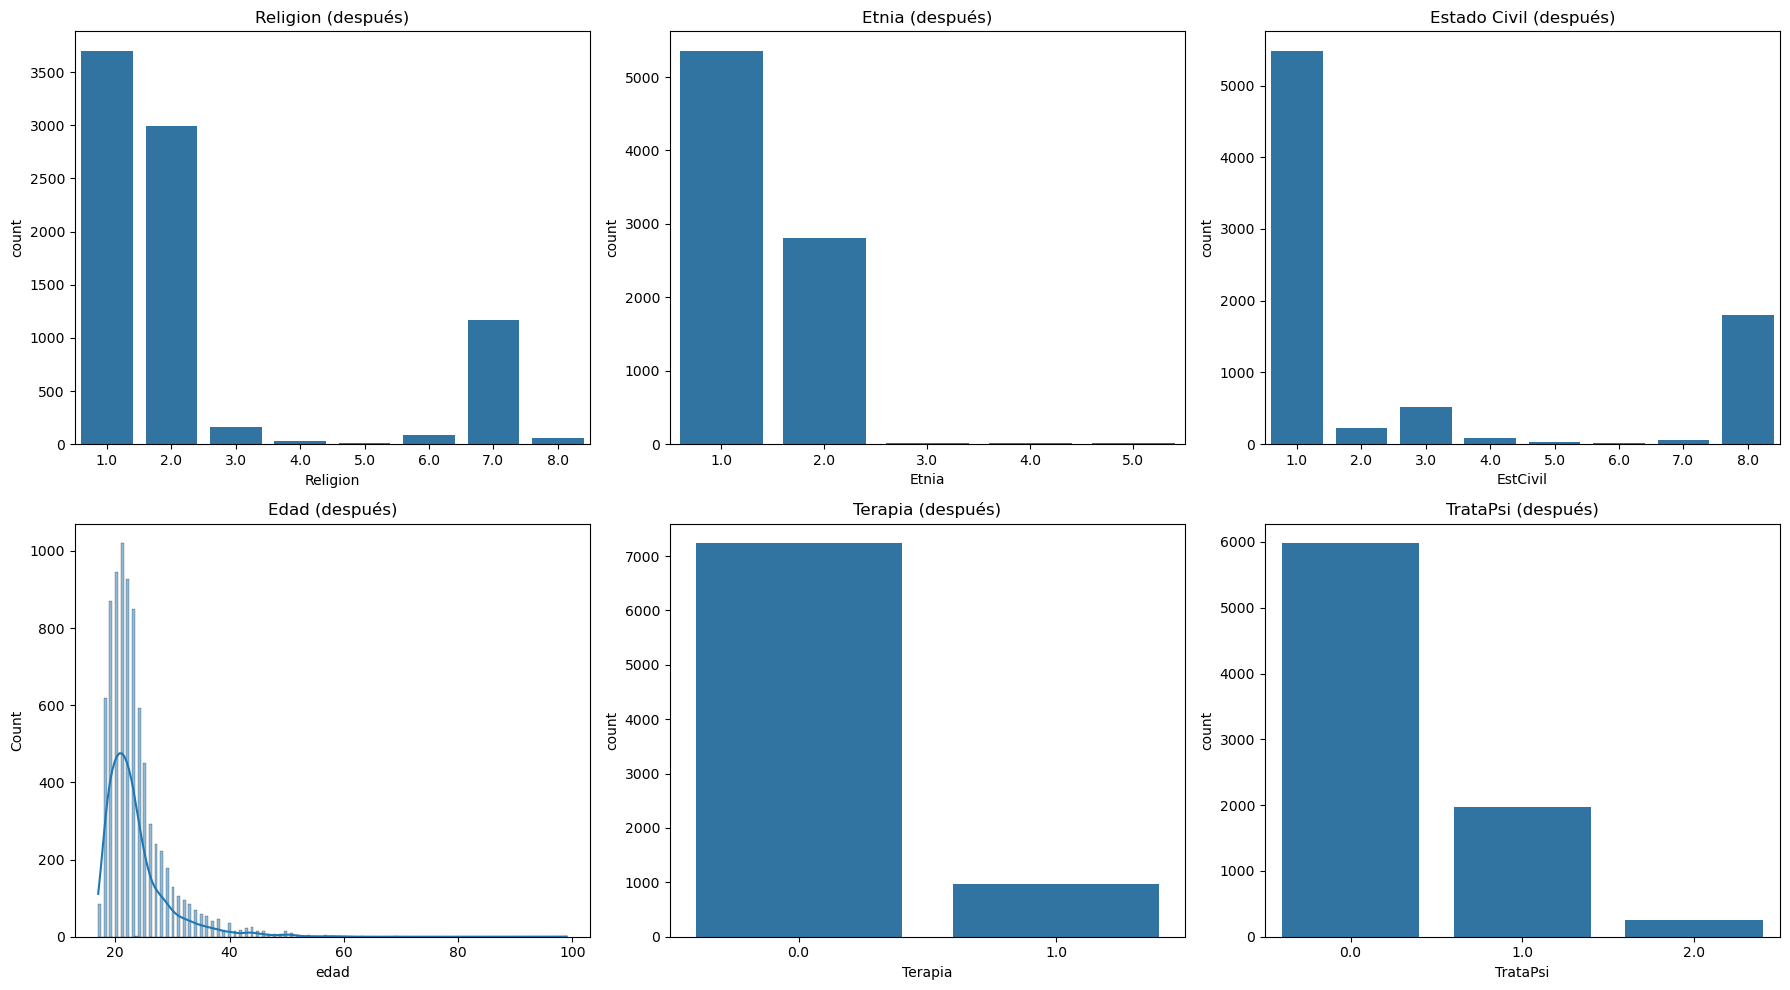

In [12]:
#Imputaciones
# Imputación con moda para variables categóricas
df['Religion'] = df['Religion'].fillna(df['Religion'].mode()[0])
df['Etnia'] = df['Etnia'].fillna(df['Etnia'].mode()[0])
df['EstCivil'] = df['EstCivil'].fillna(df['EstCivil'].mode()[0])
df['Terapia'] = df['Terapia'].fillna(df['Terapia'].mode()[0])
df['TrataPsi'] = df['TrataPsi'].fillna(df['TrataPsi'].mode()[0])

# Imputación para variable numérica
df['edad'] = df['edad'].fillna(df['edad'].mean())

#Graficos después
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(x='Religion', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Religion (después)')

sns.countplot(x='Etnia', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Etnia (después)')

sns.countplot(x='EstCivil', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Estado Civil (después)')

sns.histplot(df['edad'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Edad (después)')

sns.countplot(x='Terapia', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Terapia (después)')

sns.countplot(x='TrataPsi', data=df, ax=axs[1, 2])
axs[1, 2].set_title('TrataPsi (después)')

plt.tight_layout()
plt.show()

### ¿Tienehijos
Tipo de variable: Categórica dicotómica (binaria)

Valores posibles: 0 (no), 1 (sí)

Valores faltantes: 207 (2.52%)

Imputación recomendada Moda (valor más frecuente): Es una opción segura y coherente en variables categóricas, sobre todo binarias.

In [13]:
# Número de valores faltantes
c = '¿Tienehijos'
faltantes = df[c].isna().sum()

# Total de registros
total = len(df[c])

# Porcentaje de valores faltantes
porcentaje = (faltantes / total) * 100

print(f"Columna '{c}':")
print(f"Valores faltantes: {faltantes}")
print(f"Porcentaje faltante: {porcentaje:.2f}% \n")

Columna '¿Tienehijos':
Valores faltantes: 207
Porcentaje faltante: 2.52% 



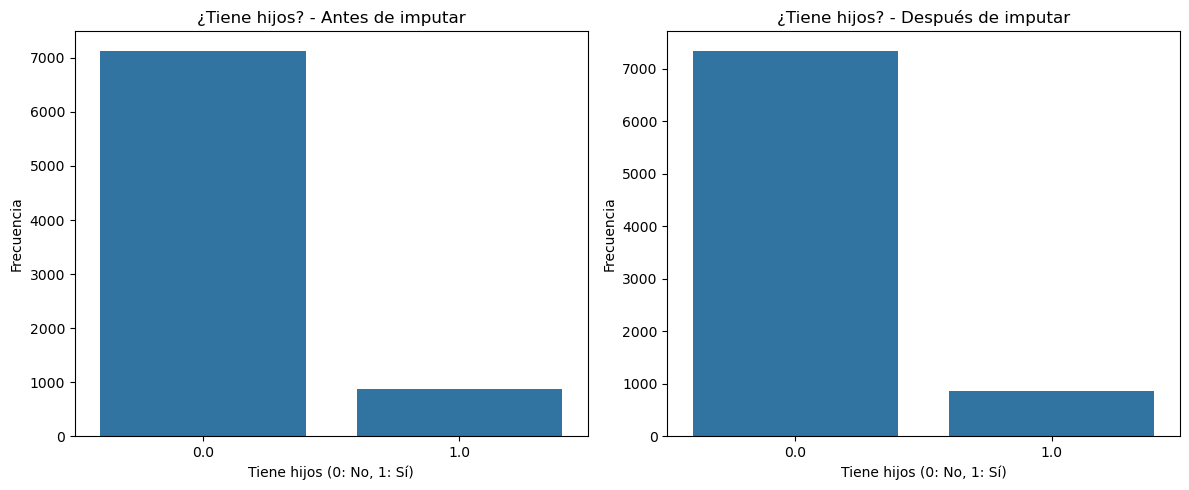

In [14]:
# Antes de imputar
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='¿Tienehijos')
plt.title('¿Tiene hijos? - Antes de imputar')
plt.xlabel('Tiene hijos (0: No, 1: Sí)')
plt.ylabel('Frecuencia')

# Imputación
df['¿Tienehijos'] = df['¿Tienehijos'].fillna(df['¿Tienehijos'].mode()[0])

# Después de imputar
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='¿Tienehijos')
plt.title('¿Tiene hijos? - Después de imputar')
plt.xlabel('Tiene hijos (0: No, 1: Sí)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Semestre
Dado que hay registros con semestre 13, eso sugiere que la variable se llenó manualmente y representa realmente la posición académica actual del estudiante. En ese caso, sí es válido tratarla como una variable numérica discreta.

Como se puede evidenciar en el histrograma previo a la imputacitiene sesgo a la izquierda y predominan valores como 2, 4 y 6, eso indica que la mayoría de los estudiantes están en los primeros años de la carrera. Entonces, la mejor imputación sería por moda, ya que:
* La media podría verse afectada por los valores más altos (como 10, 11, 13).
* La moda refleja mejor el semestre más común entre los estudiantes reales.

In [15]:
# Número de valores faltantes
c = 'Semestre'
faltantes = df[c].isna().sum()

# Total de registros
total = len(df[c])

# Porcentaje de valores faltantes
porcentaje = (faltantes / total) * 100

print(f"Columna '{c}':")
print(f"Valores faltantes: {faltantes}")
print(f"Porcentaje faltante: {porcentaje:.2f}% \n")

Columna 'Semestre':
Valores faltantes: 265
Porcentaje faltante: 3.23% 



Text(0, 0.5, 'Frecuencia')

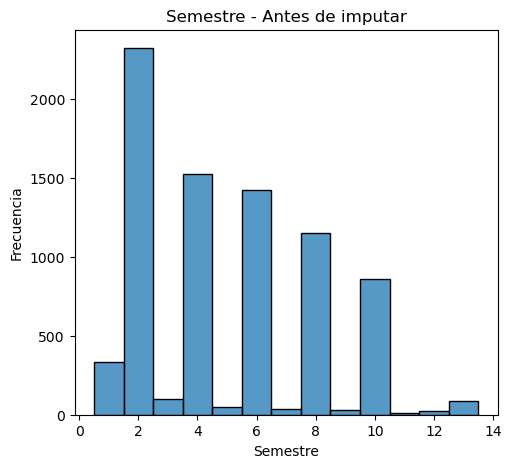

In [16]:
# Histograma antes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Semestre'], bins=range(1,15), discrete=True)
plt.title('Semestre - Antes de imputar')
plt.xlabel('Semestre')
plt.ylabel('Frecuencia')

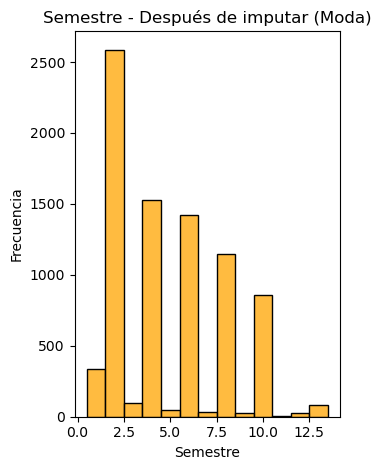

In [17]:
# Imputación por moda
moda_semestre = df['Semestre'].mode()[0]
df['Semestre'] = df['Semestre'].fillna(moda_semestre)

# Histograma después de la imputación
plt.subplot(1, 2, 2)
sns.histplot(df['Semestre'], bins=range(1, 15), discrete=True, color='orange')
plt.title('Semestre - Después de imputar (Moda)')
plt.xlabel('Semestre')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Jornada
Es categórica ordinal codificada numéricamente, ya que representa tipos de jornada (con un cierto orden implícito de tiempo).
También es discreta, ya que toma valores enteros y específicos. Dado que solo hay 1 dato faltante (0.01%), el impacto es mínimo. Sin embargo, es buena práctica imputarlo para mantener consistencia. Como es una variable categórica ordinal, la mejor imputación es por moda, ya que:

* Mantiene la categoría más común.

* No asume promedios como la media, que no tienen sentido aquí.


In [19]:
# Número de valores faltantes
c = 'Jornada'
faltantes = df[c].isna().sum()

# Total de registros
total = len(df[c])

# Porcentaje de valores faltantes
porcentaje = (faltantes / total) * 100

print(f"Columna '{c}':")
print(f"Valores faltantes: {faltantes}")
print(f"Porcentaje faltante: {porcentaje:.2f}% \n")

Columna 'Jornada':
Valores faltantes: 1
Porcentaje faltante: 0.01% 



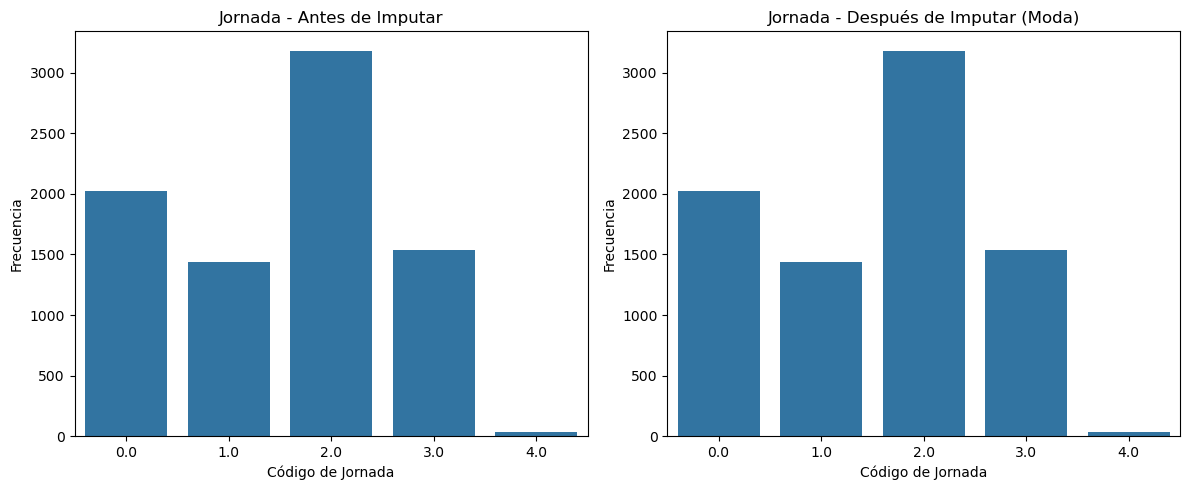

In [21]:
# Graficar antes y después de la imputación
plt.figure(figsize=(12, 5))

# Antes (usa una copia del dataframe original con el dato faltante)
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Jornada')
plt.title('Jornada - Antes de Imputar')
plt.xlabel('Código de Jornada')
plt.ylabel('Frecuencia')

# Después de imputar por moda
df['Jornada'] = df['Jornada'].fillna(df['Jornada'].mode()[0])

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Jornada')
plt.title('Jornada - Después de Imputar (Moda)')
plt.xlabel('Código de Jornada')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Carrera
Es una variable categórica nominal abierta (respuesta libre).
Debido a que es respuesta escrita, seguramente contiene:
* Variaciones por errores de escritura ("Ingeniería", "ingenieria", "Ingeneria", etc.)
* Carreras poco frecuentes o incluso únicas.

¿Por qué no se recomienda imputar?
No es una variable numérica o categórica bien definida con opciones limitadas. Imputar por moda introduciría sesgo fuerte hacia la carrera más común.
Imputar con "Desconocido" o "Otro" tampoco es ideal si se quiere hacer análisis de carrera más adelante.

Dado que los 265 faltantes coinciden con los de ‘Semestre’ que se analizó anteriormente, es posible que esas personas no contestaron esa sección completa (y podría indicar registros incompletos). **Además es una muestra pequeña, por lo que se toma la decisión de eliminar estos registros.**

In [23]:
# Número de valores faltantes
c = 'Carrera'
faltantes = df[c].isna().sum()

# Total de registros
total = len(df[c])

# Porcentaje de valores faltantes
porcentaje = (faltantes / total) * 100

print(f"Columna '{c}':")
print(f"Valores faltantes: {faltantes}")
print(f"Porcentaje faltante: {porcentaje:.2f}% \n")

Columna 'Carrera':
Valores faltantes: 265
Porcentaje faltante: 3.23% 



In [24]:
# Eliminar filas donde 'Carrera' es nula
df = df.dropna(subset=['Carrera'])

### Cuestionario de salud del paciente-9 (PHQ-9)
A continuación, un análisis sobre los datos faltantes sobre estos valores que son de alto impacto para el análisis y
entrenamiento del modelo. El criterio se aplicará de la siguiente manera:
       
 * Ver la cantidad de ítems faltantes por fila para tomar decisiones informadas:

     * Si una persona respondió 8 de 9 ítems imputar el que falta.

     * Pero si alguien dejó 6 ítems en blanco es mejor eliminar ese registro por falta de confiabilidad.

In [26]:
# Contar cuántos valores no nulos hay por fila en las 9 preguntas PHQ
phq_cols = ['@01PHQ', '@02PHQ', '@03PHQ', '@04PHQ', '@05PHQ', '@06PHQ', '@07PHQ', '@08PHQ', '@09PHQ']
df['phq_non_null_count'] = df[phq_cols].notnull().sum(axis=1)

# Revisar cuántas personas tienen menos de 7 ítems respondidos
df['phq_non_null_count'].value_counts().sort_index()


phq_non_null_count
0     116
1       2
2       1
4       1
5       1
6       1
8       2
9    7818
Name: count, dtype: int64

La interpretación de los resultados anteriores indica la cantidad de personas que respondieron la cantidad de preguntas especificadas.
| Ítems respondidos | Personas |
| ----------------- | -------- |
| 0                 | 116      |
| 1                 | 2        |
| 2                 | 1        |
| 4                 | 1        |
| 5                 | 1        |
| 6                 | 1        |
| 8                 | 2        |
| 9 (completo)    | **7818** |

Por tanto, para garantizar una mayor integridad en los datos se procede a eliminar los registros que hayan respondido menos de 7, los demás serán 
imputados para completar los datos faltantes.


In [27]:
# Eliminar registros con menos de 7 ítems respondidos
df = df[df['phq_non_null_count'] >= 7]

phq_cols = ['@01PHQ', '@02PHQ', '@03PHQ', '@04PHQ', '@05PHQ', '@06PHQ', '@07PHQ', '@08PHQ', '@09PHQ']

# Imputar valores faltantes con el promedio personal (solo si falta 1)
df[phq_cols] = df[phq_cols].apply(lambda row: row.fillna(row.mean()), axis=1)


### Trastorno de ansiedad generalizada de 7 ítems (GAD-7)

In [33]:
gad_items = ['@1GAD', '@2GAD', '@3GAD', '@4GAD', '@5GAD', '@6GAD', '@7GAD']
gad_non_null_count = df[gad_items].notnull().sum(axis=1)
gad_non_null_count.value_counts().sort_index()


4       1
6      14
7    7805
Name: count, dtype: int64

Estos resultados indican lo siguiente:

**7805** registros (99.8%) tienen los 7 ítems del GAD-7 completos.

**14** registros tienen 6 ítems respondidos → son buenos candidatos para imputación.

**1** registro tiene solo 4 ítems → este debe eliminarse.

In [34]:
# 1. Definir las columnas GAD-7
gad_items = ['@1GAD', '@2GAD', '@3GAD', '@4GAD', '@5GAD', '@6GAD', '@7GAD']

# 2. Contar cuántas respuestas no nulas tiene cada registro
gad_non_null_count = df[gad_items].notnull().sum(axis=1)

# 3. Eliminar registros con menos de 6 respuestas
df = df[gad_non_null_count >= 6].copy()

# 4. Imputar los valores faltantes (solo si hay 6 respuestas) con la media de la fila
for col in gad_items:
    df[col] = df[gad_items].T.apply(
        lambda row: row.fillna(row.mean()) if row.notnull().sum() == 6 else row,
        axis=0
    ).T[col]


### Transformación de datos categóricos
**ConsumoSustancias** es de tipo binario, 0 para No y 1 para sí. Sin embargo analizando los datos originales se observa que algunos valores nulos es porque corresponde a un 0 en ConsumoSustancias, probablemente al hecho de que si no consumían no respondieron explícitamente 'No'. Por otro lado, se debe codificar las variables categóricas de Tabaco, Marihuana y Alcohol para facilitar el análisis posterior. Por tanto se aplica el siguiente proceso:

In [37]:
# Definir columnas de sustancias específicas
sustancias_cols = [
    'Tabaco¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimos',
    'Marihuana¿Quétipodesustanciaspsicoactivashaconsumidoenlosúlti',
    'Alcohol¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimo'
]

# Imputar ConsumoSustancias: 1 si al menos una de las otras tiene dato, si no colocará un 0
df['ConsumoSustancias'] = df[sustancias_cols].notnull().any(axis=1).astype(int)

#Transformar esas 3 columnas en variables binarias (0/1):
for col in sustancias_cols:
    df[col] = df[col].notnull().astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7819 entries, 0 to 8206
Data columns (total 79 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Trabajo                                                        7819 non-null   float64
 1   Sexo                                                           7819 non-null   float64
 2   Religion                                                       7819 non-null   float64
 3   Etnia                                                          7819 non-null   float64
 4   EstCivil                                                       7819 non-null   float64
 5   edad                                                           7819 non-null   float64
 6   Terapia                                                        7819 non-null   float64
 7   TrataPsi                                                       78

### Se guarda el dataset actual con toda la información para pasar a la siguiente etapa.

In [39]:
df.to_csv('datasetDatosCompletos.csv', index=False)